# Conjoint Analysis of Netflix's Feature Portfolio Project
## Introduction
    This notebook presents an in-depth analysis of the company's customers survey data to uncover insights to help the company make data-driven decisions. The analysis covers bar, lollipop, and treemap of different features, and also ExtraContent and Ads visualization analysis.
## Objective and Scope
### Objective 
    The primary goal of this analysis is to identify which features the company should invest into from customers' survey data.
### Scope
    This analysis covers the customers' survey data from market research to examine which features are the most important for customers to improve the long-term growth.
## Data Overview
### Dataset
    The dataset used for this analysis include the following columns:
    - customerid: Unique identifier for each customer (can be duplicates)
    - NumberAccounts: amount of people that can access the subscription account
    - price: monthly subscription price
    - ExtraContent: additional content that customer wants to be added into Netflix
    - ads: frequency of ads that will pop up
    - selected: identify if the description get selected or not (1 = selected, 0 = isn't selected)
### Source
    The data is a sample dataset generated for the purpose of this analysis.

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import squarify

## Load the data

In [4]:
df = pd.read_csv('netflix_customer_survey.csv')
df

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1
...,...,...,...,...,...,...
2995,900,1,15,Marvel,one_per_day,1
2996,900,2,10,HBO,none,0
2997,900,5,8,Soccer,one_per_show,0
2998,900,2,8,Marvel,one_per_day,0


## Data Cleaning and Processing
### Missing Values
    There were no missing values in the dataset.
### Data Types
    All columns had appropriate data types:
    - customerid: int64
    - NumberAccounts: int64
    - price: int64
    - ExtraContent: object
    - ads: object
    - selected: int64

In [31]:
df.dtypes

customerid         int64
NumberAccounts     int64
price              int64
ExtraContent      object
ads               object
selected           int64
content_ads       object
dtype: object

In [5]:
# Isolate X and Y
Y = df['selected']
X = df.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


## Create dummy variables

In [6]:
x_dummy = pd.get_dummies(X, columns = X.columns)
x_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


## Regression Model
    Summary statistics of different features to identify which feature is the most important.

In [7]:
# Build regression model
model = sm.GLM(Y,
              x_dummy,
              family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Mon, 27 May 2024   Deviance:                       3896.6
Time:                        18:34:29   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7043      0.090     -7.832      0.000      -0.881      -0.528
NumberAccounts_2                -0.0732      0.088     -0.832      0.406      -0.246       0.099
NumberAccounts_3                -0.0221      0.087     -0.253      0.800      -0.193       0.149
NumberAccounts_4                 0.1253      0.083      1.504      0.133      -0.038       0.289
NumberAccounts_5                 0.1317      0.084      1.564      0.118      -0.033       0.297
NumberAccounts_6                 0.4973      0.083      6.011      0.000       0.335       0.659
price_8                          0.2970      0.085      3.497      0.000       0.131       0.463
price_10                         0.2203      0.087      2.538      0.011       0.050       0.390
price_12                         0.2019      0.082      2.451      0.014       0.040       0.363
price_15                         0.0198      0.084      0.236      0.814      -0.145       0.185
price_18                        -0.1030      0.087     -1.185      0.236      -0.273       0.067
price_20                        -0.6815      0.090     -7.567      0.000      -0.858      -0.505
ExtraContent_Disney              0.2281      0.088      2.604      0.009       0.056       0.400
ExtraContent_HBO                 0.2267      0.085      2.675      0.007       0.061       0.393
ExtraContent_Marvel              0.1452      0.084      1.725      0.084      -0.020       0.310
ExtraContent_Prime originals     0.1278      0.086      1.480      0.139      -0.042       0.297
ExtraContent_Soccer             -0.2047      0.085     -2.409      0.016      -0.371      -0.038
ExtraContent_less content       -0.5684      0.087     -6.533      0.000      -0.739      -0.398
ads_none                         0.2080      0.055      3.754      0.000       0.099       0.317
ads_one_per_day                  0.1090      0.056      1.935      0.053      -0.001       0.219
ads_one_per_show                -0.3624      0.057     -6.388      0.000      -0.474      -0.251
================================================================================================
"""

## Conjoint Analysis

In [8]:
# Create dataframe with results
df_result = pd.DataFrame({'param_name': model.params.keys(),
                         'partworth': model.params.values,
                         'pval': model.pvalues})
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.704349,4.801517e-15
NumberAccounts_2,NumberAccounts_2,-0.073222,4.055067e-01
NumberAccounts_3,NumberAccounts_3,-0.022098,8.003958e-01
NumberAccounts_4,NumberAccounts_4,0.125260,1.326272e-01
NumberAccounts_5,NumberAccounts_5,0.131700,1.178162e-01
NumberAccounts_6,NumberAccounts_6,0.497323,1.846354e-09
price_8,price_8,0.297003,4.708048e-04
price_10,price_10,0.220336,1.113465e-02
price_12,price_12,0.201950,1.426045e-02
price_15,price_15,0.019817,8.137808e-01


## Identifying Significant Features
    Identify which features are significant to customers and data when the p-value is less than 0.05.

In [9]:
# Identifying the significant variables
df_result['is_significant'] = (df_result['pval'] < 0.05)
df_result['color'] = ['blue' if x else 'red' for x in df_result['is_significant']]
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.704349,4.801517e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.073222,4.055067e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.022098,8.003958e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125260,1.326272e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131700,1.178162e-01,False,red


## Bar Chart
    This horizontal bar chart shows which specific feature that customers wants in ascending order. 

In [10]:
# Sort Values
df_result = df_result.sort_values(by = 'partworth', ascending = True)

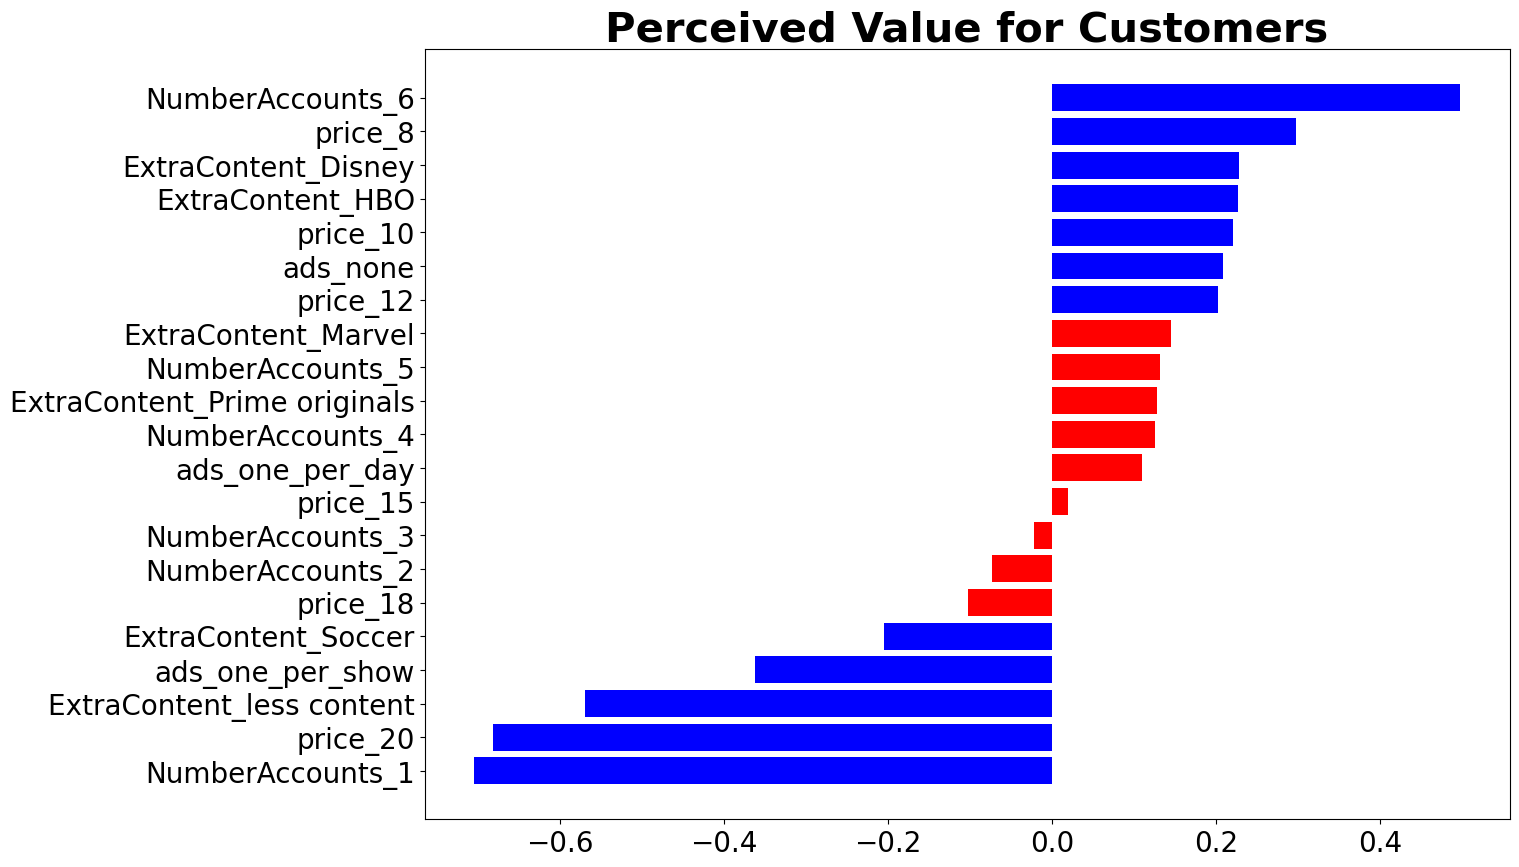

In [11]:
# Plot the Partworth
f, ax = plt.subplots(figsize = (14,10))
values = df_result['partworth']
xbar = np.arange(len(values))
plt.title('Perceived Value for Customers', fontsize = 30, fontweight = 'bold')

#Bar Plot
plt.barh(xbar,
        values,
        color = df_result['color'])

#Customizing the ticks
plt.yticks(xbar,
          labels = df_result['param_name'],
          fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

## Specific groups of Features
    Create a variable that allow users to extract specific feature they want to analyze. For example in this case, the feature is price, but users can also change it to Ads which will extract the information of Ads from the data.

In [12]:
# Isolate feature groups
feature = 'price'
attributes = []
coefficients = []
for i in range(len(df_result)):
    if df_result.iloc[i,0].find(feature) == 0:
        attributes.append(df_result.iloc[i,0])
        coefficients.append(df_result.iloc[i,1])

## Lollipop Chart
    This visualization shows an in-depth detail of specific feature which customers prefer.

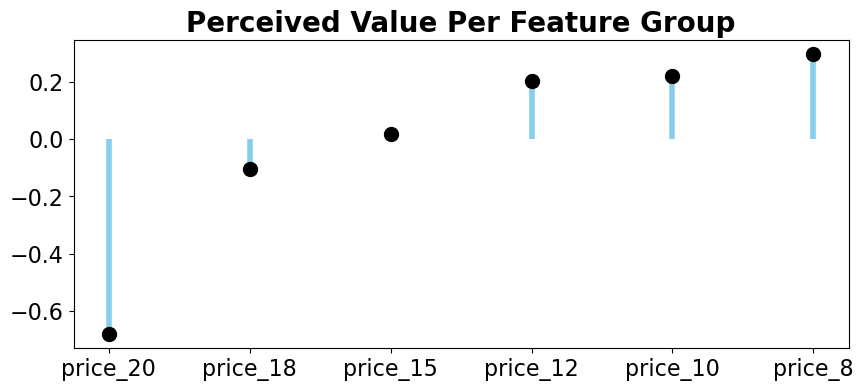

In [13]:
# Plot the Partworth
f, ax = plt.subplots(figsize = (10,4))
plt.title('Perceived Value Per Feature Group', fontsize = 20, fontweight = 'bold')

#Lollipop plot
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coefficients,
                                          linefmt = '-',
                                          markerfmt = 'o',
                                          basefmt = ' ')

#Customize the lollipop
plt.setp(stemlines,
        color = 'skyblue',
        linewidth = 4)
plt.setp(markers,
        color = 'black',
        markersize = 10)

#Customizing the ticks
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

#plt
plt.show()

## Feature Importance
    Analyze the coefficients of each feature to see which feature is the most important to customers.

In [14]:
# Coefficients
features_partworth = {}
for key, coeff in model.params.items():
  split_key = key.split('_')
  feature = split_key[0]
  if feature not in features_partworth:
    features_partworth[feature] = list()
  features_partworth[feature].append(coeff)
features_partworth

{'NumberAccounts': [-0.7043492323205388,
  -0.07322213568732747,
  -0.02209840628011244,
  0.12526023535127392,
  0.13170014413358344,
  0.497323269646052],
 'price': [0.2970028649695177,
  0.22033576456168205,
  0.2019495511785489,
  0.019817253374472286,
  -0.10295166048228856,
  -0.6815398987590032],
 'ExtraContent': [0.22812445945512141,
  0.22665671100434176,
  0.14515226324821223,
  0.12779404086146018,
  -0.20468708542671227,
  -0.5684265142994934],
 'ads': [0.20801034559739184, 0.10904514944957161, -0.3624416202040336]}

In [15]:
# Calculation: maximum of a feature (price_8) minus minimum of a feature (price 20)
importance_per_feature = {k: max(v) - min(v) for k, v in features_partworth.items()}
importance_per_feature

{'NumberAccounts': 1.2016725019665908,
 'price': 0.9785427637285209,
 'ExtraContent': 0.7965509737546148,
 'ads': 0.5704519658014254}

In [16]:
# Computing the sum of importances
total_importances = sum(importance_per_feature.values())
total_importances

3.5472182052511516

In [17]:
# Relative importance (adds up to 100)
relative_importance_per_feature = {
    k: round(100* v/total_importances,1) for k, v in importance_per_feature.items()
}
relative_importance_per_feature

{'NumberAccounts': 33.9, 'price': 27.6, 'ExtraContent': 22.5, 'ads': 16.1}

In [18]:
# Build DataFrame
df_importances = pd.DataFrame(
    list(relative_importance_per_feature.items()),
    columns = ['feature', 'relative_importance'])
df_importances

,feature,relative_importance
0,NumberAccounts,33.9
1,price,27.6
2,ExtraContent,22.5
3,ads,16.1


## Treemap of different features
    This plot of features shows the percentage of features from the most important to the least important.

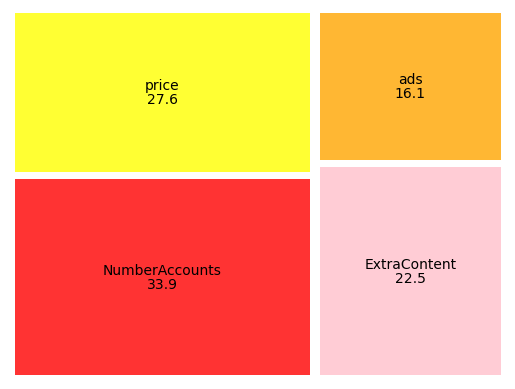

In [19]:
# Treemap
squarify.plot(sizes = df_importances.relative_importance,
              label = df_importances.feature,
              color = ["red", "yellow", "pink", "orange"],
              value = df_importances.relative_importance,
              alpha = 0.8,
              pad = 1)
plt.axis("off")
plt.show()

## Interaction Terms of ExtraContent and Ads
    Adding new columns by using string concatenate and remove columns that are not necessary for analysis.

In [20]:
# Create Interaction terms
df['content_ads'] = df.ExtraContent + "_" + df.ads
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected,content_ads
0,7,2,10,HBO,one_per_day,1,HBO_one_per_day
1,7,6,8,Marvel,one_per_show,1,Marvel_one_per_show
2,7,4,15,Disney,one_per_day,1,Disney_one_per_day
3,7,5,10,HBO,one_per_day,1,HBO_one_per_day
4,7,1,20,Soccer,one_per_show,1,Soccer_one_per_show


In [21]:
# Remove the variables in the interaction term
df_interaction = df.drop(columns = ['ExtraContent', 'ads'])
df_interaction.head()

,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_one_per_day
1,7,6,8,1,Marvel_one_per_show
2,7,4,15,1,Disney_one_per_day
3,7,5,10,1,HBO_one_per_day
4,7,1,20,1,Soccer_one_per_show


In [22]:
# Isolate Y and y
y = df_interaction.selected
X = df_interaction.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,content_ads
0,2,10,HBO_one_per_day
1,6,8,Marvel_one_per_show


In [23]:
# Create dummy Variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,content_ads_Marvel_one_per_show,content_ads_Prime originals_none,content_ads_Prime originals_one_per_day,content_ads_Prime originals_one_per_show,content_ads_Soccer_none,content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_show,content_ads_less content_none,content_ads_less content_one_per_day,content_ads_less content_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## Regression Model of ExtraContent and Ads
    Summary statistics to understand which ExtraContent and Ads are important to customers.

In [24]:
# Build the Regression Model
model2 = sm.GLM(y,
               X_dummy,
               family = sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2972
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1941.8
Date:                Mon, 27 May 2024   Deviance:                       3883.6
Time:                        18:40:59   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08767
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
NumberAccounts_1                            -0.7175      0.092     -7.788      0.000      -0.898      -0.537
NumberAccounts_2                            -0.0706      0.090     -0.785      0.433      -0.247       0.106
NumberAccounts_3                            -0.0335      0.089     -0.376      0.707      -0.208       0.141
NumberAccounts_4                             0.1119      0.085      1.324      0.185      -0.054       0.278
NumberAccounts_5                             0.1216      0.086      1.418      0.156      -0.047       0.290
NumberAccounts_6                             0.4922      0.084      5.859      0.000       0.328       0.657
price_8                                      0.2914      0.086      3.369      0.001       0.122       0.461
price_10                                     0.2113      0.089      2.381      0.017       0.037       0.385
price_12                                     0.2006      0.084      2.400      0.016       0.037       0.364
price_15                                     0.0089      0.086      0.104      0.917      -0.159       0.177
price_18                                    -0.1129      0.089     -1.275      0.202      -0.286       0.061
price_20                                    -0.6952      0.092     -7.534      0.000      -0.876      -0.514
content_ads_Disney_none                      0.3350      0.153      2.185      0.029       0.035       0.635
content_ads_Disney_one_per_day               0.5480      0.174      3.154      0.002       0.207       0.889
content_ads_Disney_one_per_show             -0.1558      0.159     -0.983      0.326      -0.466       0.155
content_ads_HBO_none                         0.5297      0.160      3.316      0.001       0.217       0.843
content_ads_HBO_one_per_day                  0.5105      0.156      3.283      0.001       0.206       0.815
content_ads_HBO_one_per_show                -0.3543      0.157     -2.257      0.024      -0.662      -0.047
content_ads_Marvel_none                      0.2577      0.153      1.689      0.091      -0.041       0.557
content_ads_Marvel_one_per_day               0.2303      0.158      1.462      0.144      -0.078       0.539
content_ads_Marvel_one_per_show             -0.0542      0.151     -0.360      0.719      -0.349       0.241
content_ads_Prime originals_none             0.2570      0.158      1.626      0.104      -0.053       0.567
content_ads_Prime originals_one_per_day      0.1291      0.155      0.834      0.404      -0.174       0.432
content_ads_Prime originals_one_per_show     0.0194      0.162      0.120      0.905      -0.298       0.337
content_ads_Soccer_none                      0.1461      0.154      0.949      0.342      -0.156       0.448
content_ads_Soccer_one_per_day 

## Interaction Terms Result for Analysis
    Create a new dataframe using the coefficients from the regression model and isolate the feature group to only extract the data with ExtraContent and Ads out of the list.

In [25]:
# Create a dataframe with the results
df_result_interaction = pd.DataFrame(
    {'param_name': model2.params.keys(),
     'partworth': model2.params.values,
     'pval': model2.pvalues}).sort_values(
         by = "partworth"
         )
df_result_interaction

,param_name,partworth,pval
content_ads_less content_one_per_show,content_ads_less content_one_per_show,-1.091769,6.233241e-10
NumberAccounts_1,NumberAccounts_1,-0.717523,6.802550e-15
price_20,price_20,-0.695164,4.922842e-14
content_ads_Soccer_one_per_show,content_ads_Soccer_one_per_show,-0.507312,1.651971e-03
content_ads_less content_one_per_day,content_ads_less content_one_per_day,-0.424236,8.409411e-03
content_ads_HBO_one_per_show,content_ads_HBO_one_per_show,-0.354345,2.403714e-02
content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_day,-0.245534,1.132301e-01
content_ads_less content_none,content_ads_less content_none,-0.225502,1.366378e-01
content_ads_Disney_one_per_show,content_ads_Disney_one_per_show,-0.155782,3.257315e-01
price_18,price_18,-0.112907,2.022905e-01


In [26]:
# Isolate the feature group
feature = "content_ads"
attributes = []
coefficients =[]
for i in range(len(df_result_interaction)):
  if df_result_interaction.iloc[i,0].find(feature) == 0:
    if df_result_interaction.iloc[i,0].find("none") == -1:
      attributes.append(df_result_interaction.iloc[i,0])
      coefficients.append(df_result_interaction.iloc[i,1])

## Lollipop Chart of ExtraContent and Ads
    This visualization helps to identify which ExtraContent and Ads that are important to customers in descending order.

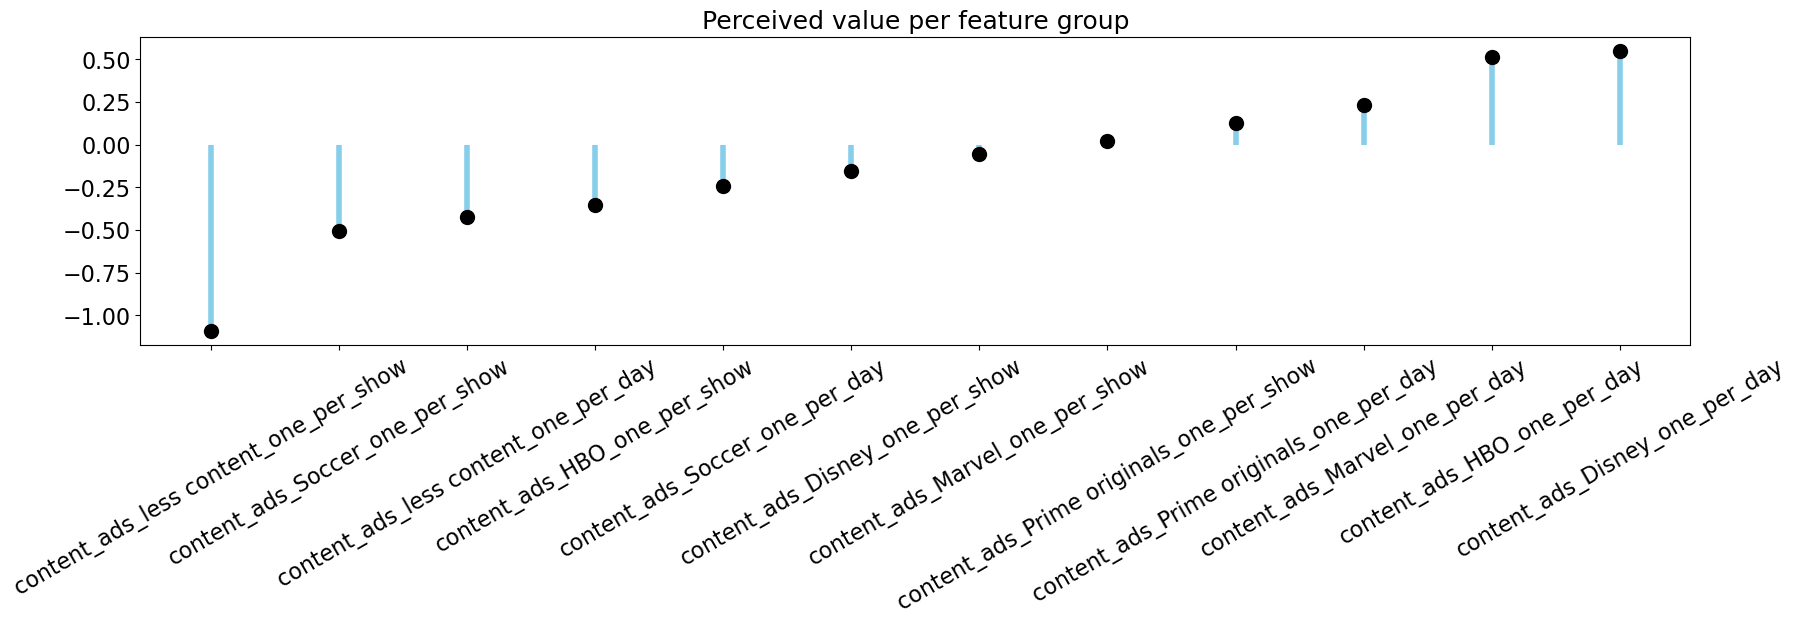

In [27]:
# Lollipop chart
# Plot the Partworth
f, ax = plt.subplots(figsize = (20,4))
plt.title("Perceived value per feature group", fontsize = 18)

# Lollipop plot
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coefficients,
                                          linefmt = "-",
                                          markerfmt = "o",
                                          basefmt = " ")

# Customize the lollipop
plt.setp(stemlines,
         color = "skyblue",
         linewidth = 4)
plt.setp(markers,
         color = "black",
         markersize = 10)

# Customizing the ticks
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16,
           rotation = 30)

#Plot
plt.show()

## Insights
    According to the Treemap visualization, it highlights the most important feature to the least important feature.
        1. Number of Accounts - 33.9%
        2. Price - 27.6%
        3. ExtraContent - 22.5%
        4. Ads - 16.1%
   ### After the analysis, the project manager said Netflix want to have long-term growth regarding these features. For these features to provide long-term growth to Netflix, we will have to do further analysis of ExtraContent and Ads features because:
    - ExtraContent will help to attract new customers and help keep current customers to go to other platform
    - Ads will be a new revenue stream that can increase Netflix's profitability
    
### Lollipop Visualization Regarding the ExtraContent and Ads Analysis
    - For one ad per day, customers wants Disney or HBO as their top 1st and 2nd.
    - For one ad per show, customers wants Prime Originals or Marvel as their top 1st and 2nd.
#### If Netflix decides to go with Prime Originals or Marvel, they can do one ad per show as well as one ad per day which will allow them to know which one will work well for them and their customers.
## Next Steps
    1. Assess the financial returns of advertisements on Netflix by partnering with interested companies to place ads and measure the returns.
    2. Determine the costs associated with adding new content, focusing on how these additions impact customer interest.
#### By comparing these financial gains from ads with the costs of new content, Netflix can evaluate the impact of these strategies on attracting new customers or renewing subscriptions.
## Conclusion
    This analysis provided actionable insights and next steps approach to optimize their profit and growths regarding their business model features. The findings help the company make informed decisions.